In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def distance(p1,p2):
    """
    ValueError: could not broadcast input array from shape (1,2) into shape (1,5)
    Euclidean Distance
    """
    return np.sqrt(np.sum(( p1 - p2 )**2 ))

def update(k_points,point_distance,idx,k):
    """
    - Find index suitable
    - if suitable index is last then the point dont deserve to be in top-k
    """
    suitableIndex = np.searchsorted(k_points[:,1], point_distance, side='left')
    if suitableIndex == k:
        return k_points
    k_points = np.insert(k_points,suitableIndex,np.array([idx,point_distance]).reshape(1,2),axis=0)
    #drop last row
    return k_points[:-1]

             
def find_k_closest_points(X,p,k):
    """
    - Initialize a place to store the index,distance of closest points with initial value as infinite
    - loop through each point in X
        - find distance between current point and p
        - Find if the point is smaller than the points that the k points
        - if true put it's index and distance in the list
    - End Loop
    """
    k_points = np.full((k,2),np.Inf)
    for idx,point in enumerate(X):
        point_distance = distance(point,p)
        k_points = update(k_points,point_distance,idx,k)
    return k_points

def KNN(X,y,p,k):
    """
    - Find k closest points
    - Find votes fo those points
    - Make decision based on those points
    """
    k_points  = find_k_closest_points(X,p,k)
    neighbour_votes = y[k_points[:,0].astype(int)]
    votes, counts = np.unique(neighbour_votes,return_counts=True)
    decision = votes[np.argmax(counts)]
    return decision,neighbour_votes,k_points


In [3]:
#data generation
n = 100
mean_1=np.array([30,40])
cov_1 = np.array([[10,0.8],[0.8,10]])
class_1_data = np.random.multivariate_normal(mean_1,cov_1,n//2)

mean_2=np.array([60,50])
cov_2 = np.array([[5,0.5],[0.5,5]])
class_2_data = np.random.multivariate_normal(mean_2,cov_2,n//2)

X = np.concatenate((class_1_data,class_2_data),axis=0)
y = np.concatenate((np.zeros(n//2),np.ones(n//2)))

In [19]:
new_point = np.array([44,48])
decision,votes,k_points = KNN(X,y,new_point,15)

Text(0.5, 1.0, 'The point has been assigned to Class: 0')

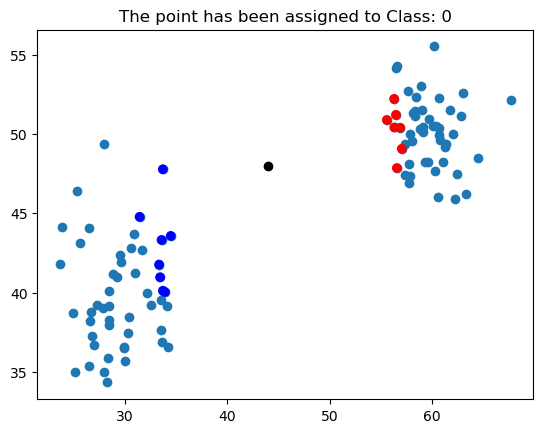

In [20]:
nearest_neighbour= X[k_points[:,0].astype(int)]
plt.scatter(X[:,0],X[:,1])
plt.scatter(new_point[0],new_point[1],color="black")
plt.scatter(nearest_neighbour[:,0],nearest_neighbour[:,1], c=votes, cmap='bwr')
plt.title(f"The point has been assigned to Class: {int(decision)}")

In [6]:
votes

array([1., 1., 1., 1., 1.])